In [1]:
from gio_model import GioModel
from math import sqrt
from time import sleep, time

import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

Turn off auto scrolling

In [2]:
%%javascript
require(
        ["notebook/js/outputarea"],
        function (oa) {
            oa.OutputArea.auto_scroll_threshold = -1;
        });

<IPython.core.display.Javascript object>

In [3]:
import numpy as np
import tensorflow as tf

tf.InteractiveSession()

ROOT_DIR = '/Users/abel/data'

def get_model(game_id):
    return GioModel.fromFile(ROOT_DIR + '/gio/models/%s.giomodel.gz' % (game_id))

models = os.listdir(ROOT_DIR + '/gio/models')
game_ids = map(lambda x: x[:x.find('.')], models)

In [4]:
model = get_model(game_ids[10])

print 'http://generals.io/replays/' + model.id

print model.ranks

http://generals.io/replays/B5-EAph8l
[7, 5, 3, 4, 0, 2, 6, 1]


In [5]:
model = get_model(game_ids[10])

print model.board_[0, 4, 1]
print model.isVisible(881, 4, 1, 7)

[ 1.  5.  4.]
True


In [6]:
owner_ch = model.board_[:, :, :, 1]
owner_ch[owner_ch == 1] = -2
owner_ch[owner_ch == 0] = 1
owner_ch[owner_ch == -2] = 0

Visualize channels for a random game:

http://generals.io/replays/rug7Jclwe
[0, 1]


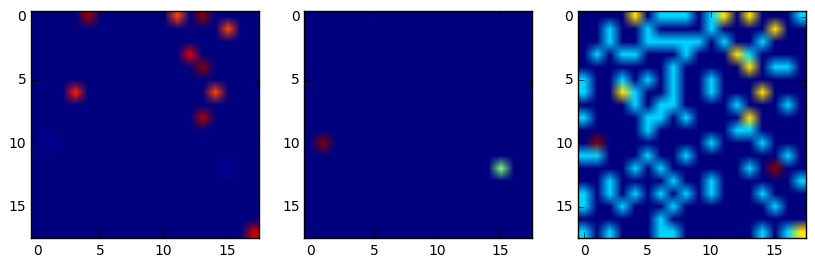

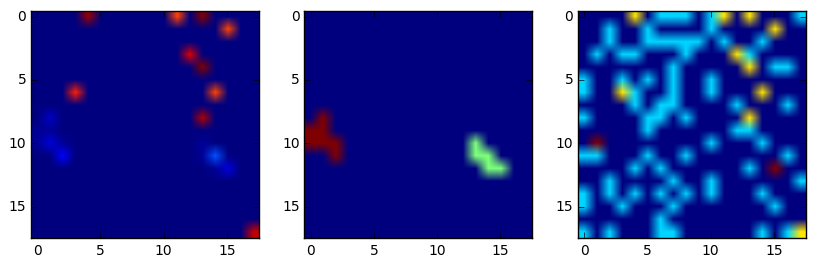

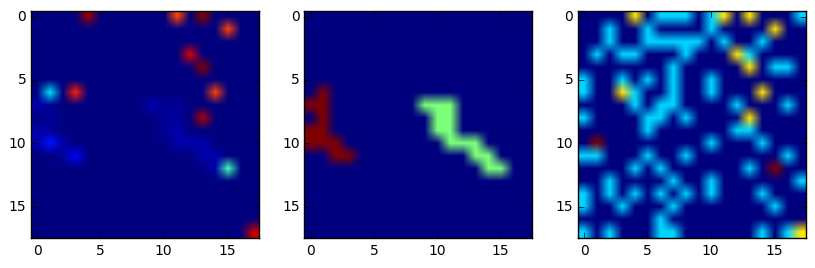

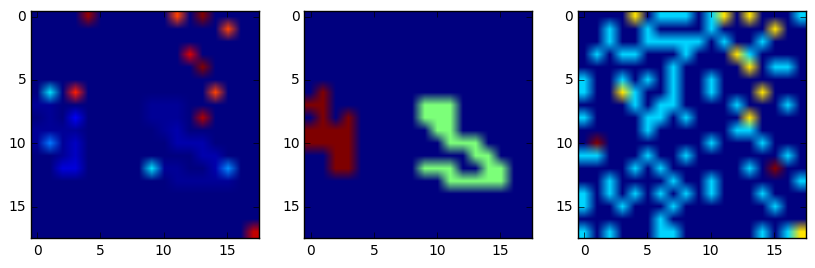

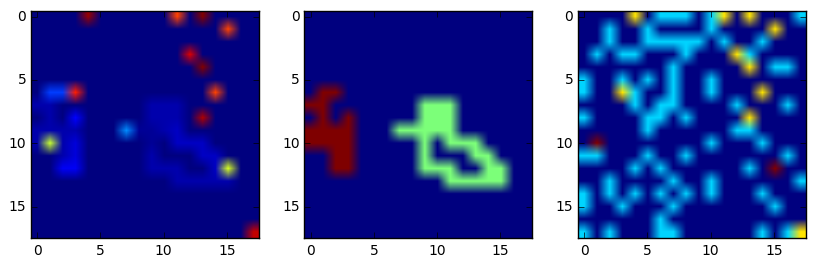

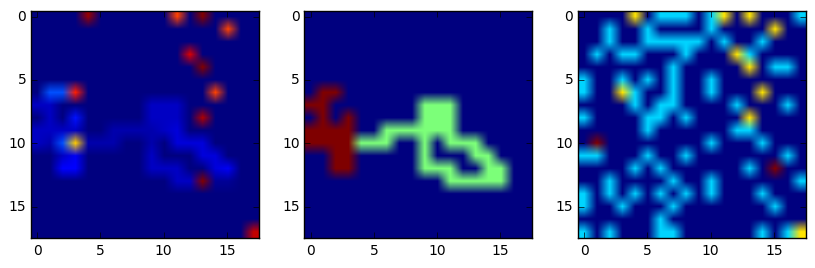

In [7]:
model = get_model(np.random.choice(game_ids, 1)[0])

def visualize_game(model, res=32, view=None):
    print 'http://generals.io/replays/' + model.id
    print model.ranks
    board = model.getBoardView(view) if view is not None else model.board_

    for i in range(board.shape[0] / res):
        turn = i * res
        fig, axs = plt.subplots(1, 3, figsize=(10, 10))
        for i in range(3):
            axs[i].imshow(board[turn][:, :, i])

visualize_game(model)

Visualize game from player-index 0's perspective:

http://generals.io/replays/rug7Jclwe
[0, 1]


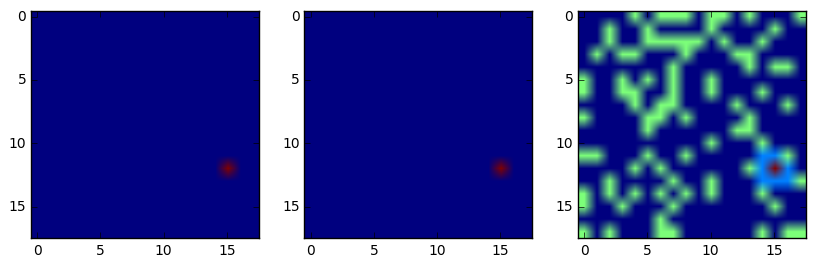

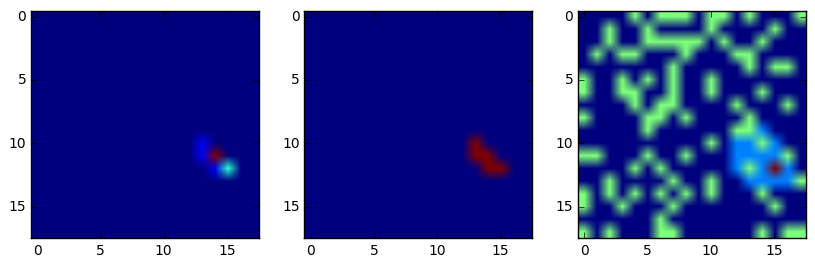

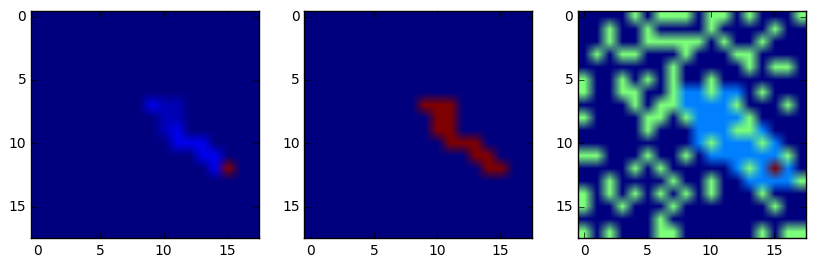

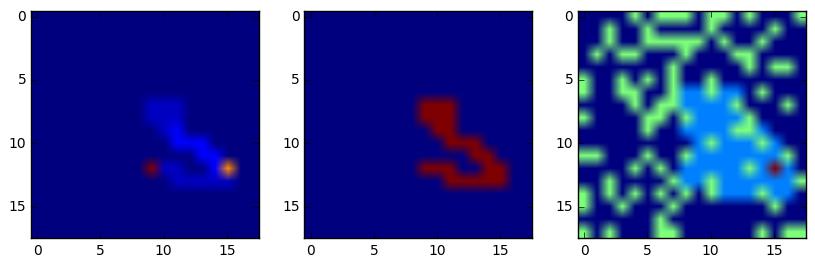

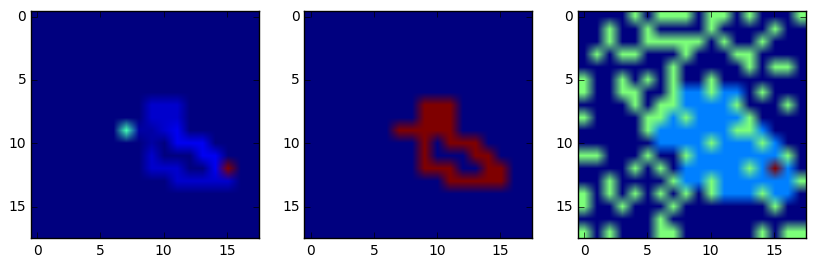

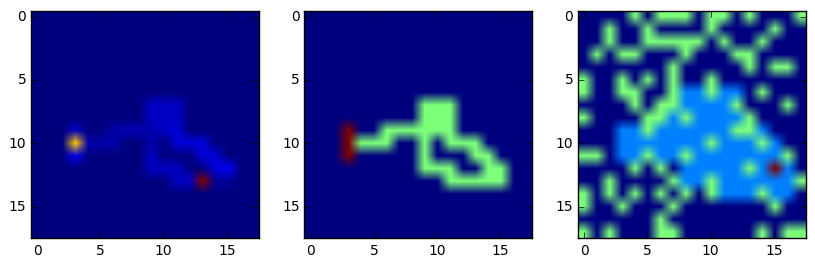

In [8]:
visualize_game(model, view=0)

In [109]:
scoreboard = model.getScoreBoard()
army_count = np.zeros((model.num_turns, 8))
army_count[:, :model.num_players] = scoreboard['army']

In [39]:
ex = tf.train.SequenceExample(
    context=tf.train.Features(feature={
        'a': tf.train.Feature(float_list=tf.train.FloatList(value=[0.5]))
    }),
    feature_lists=tf.train.FeatureLists(feature_list={
        'b': tf.train.FeatureList(feature=[
                tf.train.Feature(float_list=tf.train.FloatList(value=[1, 2])),
                tf.train.Feature(float_list=tf.train.FloatList(value=[3, 4]))])
    }))
print ex

context {
  feature {
    key: "a"
    value {
      float_list {
        value: 0.5
      }
    }
  }
}
feature_lists {
  feature_list {
    key: "b"
    value {
      feature {
        float_list {
          value: 1
          value: 2
        }
      }
      feature {
        float_list {
          value: 3
          value: 4
        }
      }
    }
  }
}



In [44]:
context_features = { 'a': tf.FixedLenFeature([], dtype=tf.float32) }
sequence_features = { 'b': tf.FixedLenSequenceFeature([2], dtype=tf.float32) }
context, sequence = tf.parse_single_sequence_example(
  ex.SerializeToString(),
  context_features,
  sequence_features)

In [53]:
sequence['b'].get_shape()

TensorShape([Dimension(None), Dimension(2)])

In [60]:
a = np.random.random((3, 2, 2, 2))
print a

[[[[ 0.02328163  0.19177964]
   [ 0.15603212  0.95703728]]

  [[ 0.33042251  0.48722125]
   [ 0.02139627  0.03418985]]]


 [[[ 0.37708043  0.79229883]
   [ 0.85517015  0.45330422]]

  [[ 0.70897179  0.21932851]
   [ 0.57981544  0.16959676]]]


 [[[ 0.49687416  0.6747879 ]
   [ 0.64340998  0.5260161 ]]

  [[ 0.92622931  0.19302145]
   [ 0.49214013  0.20028001]]]]


In [61]:
b = np.zeros((3, 3, 3, 2))
b[:a.shape[0], :a.shape[1], :a.shape[2], :a.shape[3]] = a

In [89]:
record_iterator = tf.python_io.tf_record_iterator("/Users/abel/data/gio/examples/validation.tfrecords");

In [101]:
record = record_iterator.next()

In [102]:
ex = tf.train.SequenceExample()
ex.ParseFromString(record)

In [103]:
ex.context

feature {
  key: "height"
  value {
    int64_list {
      value: 18
    }
  }
}
feature {
  key: "label"
  value {
    int64_list {
      value: 0
    }
  }
}
feature {
  key: "num_players"
  value {
    int64_list {
      value: 2
    }
  }
}
feature {
  key: "num_turns"
  value {
    int64_list {
      value: 226
    }
  }
}
feature {
  key: "width"
  value {
    int64_list {
      value: 18
    }
  }
}

In [104]:
ex.feature_lists.feature_list['army_count']

feature {
  float_list {
    value: 0.0119047621265
    value: 0.0119047621265
  }
}
feature {
  float_list {
    value: 0.0119047621265
    value: 0.0119047621265
  }
}
feature {
  float_list {
    value: 0.023809524253
    value: 0.023809524253
  }
}
feature {
  float_list {
    value: 0.023809524253
    value: 0.023809524253
  }
}
feature {
  float_list {
    value: 0.0357142873108
    value: 0.0357142873108
  }
}
feature {
  float_list {
    value: 0.0357142873108
    value: 0.0357142873108
  }
}
feature {
  float_list {
    value: 0.047619048506
    value: 0.047619048506
  }
}
feature {
  float_list {
    value: 0.047619048506
    value: 0.047619048506
  }
}
feature {
  float_list {
    value: 0.0595238097012
    value: 0.0595238097012
  }
}
feature {
  float_list {
    value: 0.0595238097012
    value: 0.0595238097012
  }
}
feature {
  float_list {
    value: 0.0714285746217
    value: 0.0714285746217
  }
}
feature {
  float_list {
    value: 0.0714285746217
    value: 0.07142857

In [ ]:
example = tf.parse_single_example(serialized_example,
                        features={
                          'width': tf.FixedLenFeature([], tf.int64),
                          'height': tf.FixedLenFeature([], tf.int64),
                          'num_players': tf.FixedLenFeature([], tf.int64),
                          'board': tf.FixedLenFeature([], tf.int64),
                          'army_count': tf.FixedLenFeature([], tf.float32),
                          'fort_count': tf.FixedLenFeature([], tf.float32),
                          'land_count': tf.FixedLenFeature([], tf.float32),
                          'label': tf.FixedLenFeature([], tf.int64),
                        })